<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [152]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.8.0


## 2. Setting Options

In [153]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [154]:
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNLP/SNLP Internal Lab/product_data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNLP/SNLP Internal Lab/reviews.csv')

In [155]:
products_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
660,B07WCCNV2D,Xiaomi,"Xiaomi Redmi Note 7 (64GB, 4GB RAM) 6.3"" Displ...",https://www.amazon.com/Xiaomi-Display-Camera-F...,https://m.media-amazon.com/images/I/51Q73J3PM4...,3.6000000,https://www.amazon.com/product-reviews/B07WCCNV2D,5,179.8700000,189.8700000
50,B00E8TGT1S,Nokia,Nokia Lumia 520 Quad-Band GSM Unlocked Smartph...,https://www.amazon.com/Nokia-Lumia-Quad-Band-U...,https://m.media-amazon.com/images/I/61huy0bRgE...,2.1000000,https://www.amazon.com/product-reviews/B00E8TGT1S,5,0.0000000,0.0000000
338,B078HFZVZ8,Apple,"Apple iPad 2 MC774LL/A Tablet (32GB, Wifi + AT...",https://www.amazon.com/Apple-MC774LL-Tablet-Ge...,https://m.media-amazon.com/images/I/51yCOZ9kZK...,3.2000000,https://www.amazon.com/product-reviews/B078HFZVZ8,5,129.6000000,0.0000000
26,B007X6FFLS,Samsung,Samsung a157 GoPhone (AT&T),https://www.amazon.com/Samsung-a157-GoPhone-AT...,https://m.media-amazon.com/images/I/71Y+FpZYcF...,3.4000000,https://www.amazon.com/product-reviews/B007X6FFLS,305,97.6900000,0.0000000
168,B01LXF0WML,Sony,"Sony Xperia XZ F8332 64GB Forest Blue, 5.2"", D...",https://www.amazon.com/Sony-F8332-Unlocked-Int...,https://m.media-amazon.com/images/I/61XyeFgc3v...,3.9000000,https://www.amazon.com/product-reviews/B01LXF0WML,255,269.9900000,679.9900000


In [156]:
reviews_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
13378,B00NO2WXM4,Sarah,1,"December 25, 2015",True,disappointed,"I just bought this phone, I was so disappointe...",1.0000000
26764,B01M0PADR4,Josh W.,1,"October 17, 2017",True,worked fine for about a month (which coinciden...,"Got the phone, worked fine for about a month (...",2.0000000
10361,B00JEHJMG8,Granny Kathy,5,"June 25, 2016",True,I'm very pleased with it,I was worried about buying a phone not knowing...,NaN
45915,B079X7DQ4Q,John D.,5,"June 11, 2018",True,Best phone i had.,Great phone.,1.0000000
36283,B071ZDQ6MV,Jim Power,2,"October 24, 2017",True,Don't expect too much for such a low price..,"Slow device, horrible camera, freezing screen ...",NaN


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [157]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [158]:
drop_columns_products = ['image', 'url', 'reviewUrl']

In [159]:
products_df = products_df.drop(columns=drop_columns_products)

In [160]:
products_df.head(2)

,asin,brand,title,rating,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000


In [161]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [162]:
products_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,720,720,B0000SX2UC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,716,10,Samsung,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,720,718,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,720.0000000,NaN,NaN,NaN,3.7137500,0.7160138,1.0000000,3.3000000,3.8000000,4.1000000,5.0000000
totalReviews,720.0000000,NaN,NaN,NaN,105.6791667,167.6011014,1.0000000,7.0000000,32.0000000,122.2500000,983.0000000
price,720.0000000,NaN,NaN,NaN,234.9489306,200.0084407,0.0000000,97.5125000,188.9750000,336.7250000,999.9900000
originalPrice,720.0000000,NaN,NaN,NaN,63.6907778,172.4053696,0.0000000,0.0000000,0.0000000,0.0000000,999.9900000


In [163]:
reviews_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,67986,720,B00F2SKPIM,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,67984,47323,Amazon Customer,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,67986.0000000,NaN,NaN,NaN,3.8079163,1.5829058,1.0000000,3.0000000,5.0000000,5.0000000,5.0000000
date,67986,2983,"December 11, 2019",234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified,67986,2,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,67972,41489,Five Stars,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,67965,59811,Good,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,27215.0000000,NaN,NaN,NaN,8.2296895,31.9548772,1.0000000,1.0000000,2.0000000,5.0000000,990.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

ASIN is a unique value, it is like a ID.

Samsung is the top brand.

Price ranges from 0 to 999$.

Title has 718 unique values in 720 records.

The review ranges from 0 - 5 and the average is 3.8.

Verified reviews are 61k out of 67k.

There are 41k unqiue titles in 67k records.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

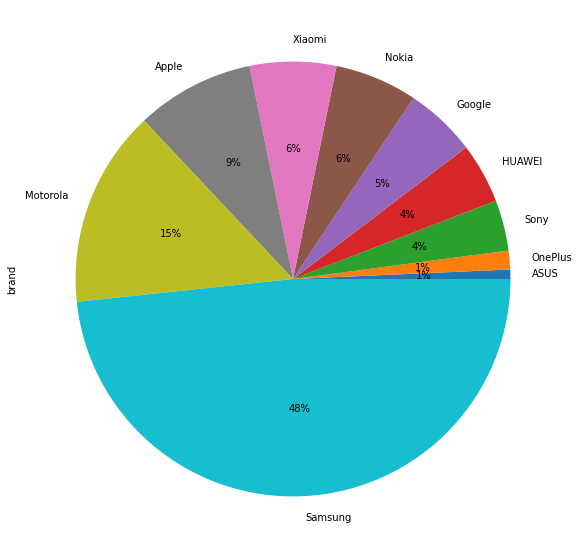

In [164]:
products_df.brand.value_counts().sort_values().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))

In [165]:
reviews_df.rating.value_counts()

5    37752
1    12743
4     8824
3     4752
2     3915
Name: rating, dtype: int64

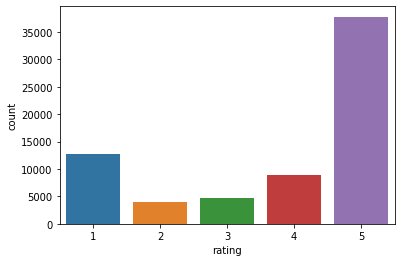

In [166]:
sns.countplot(reviews_df.rating)

### 4.5 Display average rating per brand

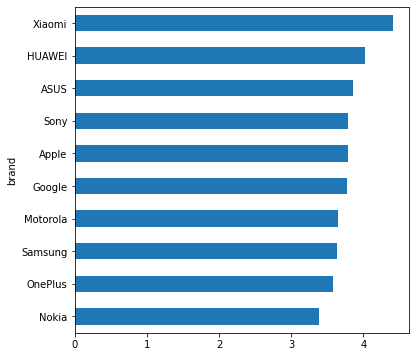

In [167]:
products_df.groupby(by='brand').mean().rating.sort_values().plot(kind='barh',
                                                               figsize=(6,6))

### 4.6 Display average price per brand

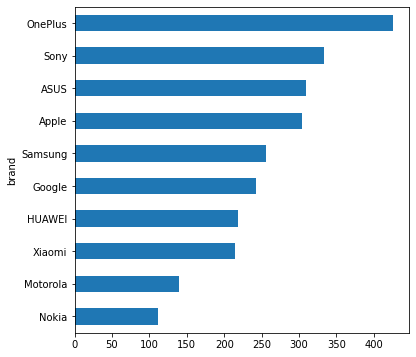

In [168]:
products_df.groupby(by='brand').mean().price.sort_values().plot(kind='barh',
                                                                figsize=(6,6))

### 4.7 Display average 'totalReviews' per brand

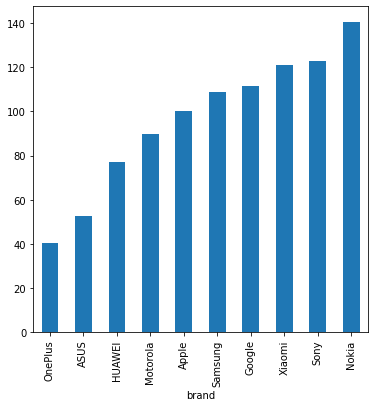

In [169]:
products_df.groupby(by='brand').mean().totalReviews.sort_values().plot(kind='bar',
                                                                       figsize=(6,6))

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [170]:
df = pd.merge(reviews_df, products_df, on='asin')

In [171]:
df.shape

(67986, 14)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           67986 non-null  object 
 1   name           67984 non-null  object 
 2   rating_x       67986 non-null  int64  
 3   date           67986 non-null  object 
 4   verified       67986 non-null  bool   
 5   title_x        67972 non-null  object 
 6   body           67965 non-null  object 
 7   helpfulVotes   27215 non-null  float64
 8   brand          67786 non-null  object 
 9   title_y        67986 non-null  object 
 10  rating_y       67986 non-null  float64
 11  totalReviews   67986 non-null  int64  
 12  price          67986 non-null  float64
 13  originalPrice  67986 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 7.3+ MB


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [173]:
df.rename(columns={'rating_x': 'user_rating', 'title_x': 'review_title', 'title_y': 'item_title', 'rating_y': 'overall_rating'}, inplace=True)

In [174]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [175]:
df_verified = df[df.verified]

In [176]:
df_verified.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [177]:
df_verified.brand.value_counts()

Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: brand, dtype: int64

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [178]:
keep_columns = ['brand', 'body', 'price', 'user_rating', 'review_title']

In [179]:
df_final = df_verified[keep_columns]

In [180]:
df_final.sample(5)

,brand,body,price,user_rating,review_title
52878,Xiaomi,Recently broke my Moto G5 plus and replaced it...,179.5000000,1,An exercise in minor frustrations
20290,Motorola,"Great phone, the display is beautiful, battery...",239.9900000,5,Still great in 2018
59161,Samsung,Very good product,215.0000000,5,Very good
30055,Samsung,Just as advertised. Works just fine. Looks lik...,207.9900000,5,Good value
54937,Samsung,Phone keeps rebooting for hours at a time. ver...,209.9900000,1,J7 keeps rebooting


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

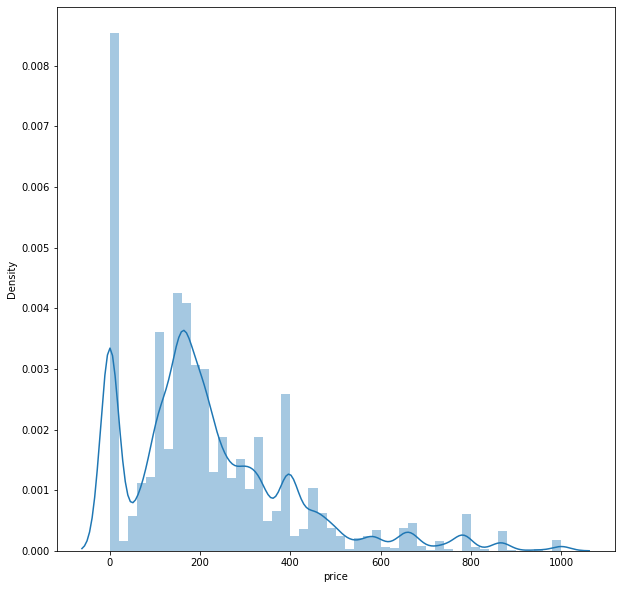

In [181]:
plt.figure(figsize=(10,10))
sns.distplot(df_final.price)

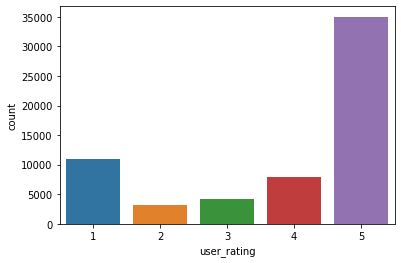

In [182]:
sns.countplot(df_final.user_rating)

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [183]:
df_final['sentiment'] = df_final.user_rating.apply(lambda x: 1 if x > 3 else (0 if x == 3 else -1))

In [184]:
df_final.sample(5)

,brand,body,price,user_rating,review_title,sentiment
15711,Samsung,"My galaxy s6 g920 doesnt working properly, whe...",0.0000000,1,"My galaxy s6 g920 doesnt working properly,",-1
19840,Samsung,"Everything is good , the only problem is the b...",0.0000000,4,"Everything is good, the only problem is the ba...",1
41778,Apple,I requested a silver one and got a gray one. E...,479.0000000,1,I requested a silver one for my wife and recei...,-1
55289,OnePlus,Perfect. Works out cheaper to get it from Amaz...,599.9900000,5,You will be billed for customs even though it'...,1
57215,Motorola,Was torn in what to buy at this price range be...,202.9900000,5,Solid purchase. Don't get caught up on specs. ...,1


### 4.15 Check frequency distribution of the 'sentiment'

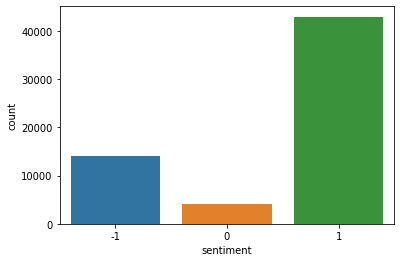

In [185]:
sns.countplot(df_final.sentiment)

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

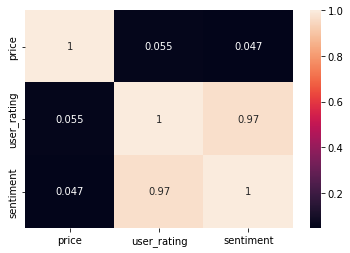

In [186]:
sns.heatmap(df_final.corr(), annot=True)

Sentiment and user rating are highly correlated, since its derived from the other.

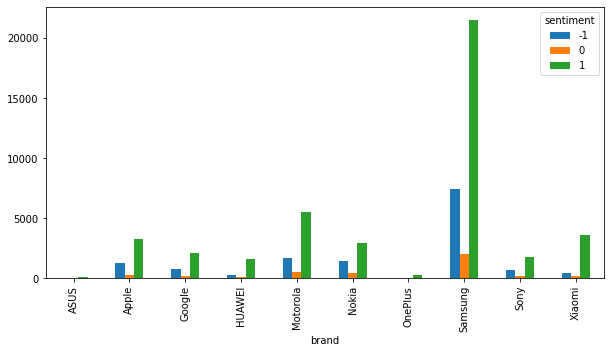

In [187]:
pd.crosstab(df_final.brand, df_final.sentiment).plot(kind='bar', figsize=(10, 5))

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [188]:
df_final.body = df_final.body.astype('str')

In [189]:
df_final['keywords'] = df_final.body.apply(lambda x: x.lower())

In [193]:
df_final.sample(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
55988,Nokia,This phone has no response to your actions mos...,0.0000000,2,Does not respond to actions performed.,-1,this phone has no response to your actions mos...
42983,Apple,"So far, this phone is great. Does the job.",258.8000000,5,Trust worthy,1,so far this phone is great does the job


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [191]:
df_final['keywords'] = df_final.keywords.str.replace('[^\w\s]', '')

In [195]:
df_final.sample(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
14287,Samsung,The phone was just as expected (as seen in the...,194.0000000,4,Happy Customer,1,the phone was just as expected as seen in the ...
16388,Samsung,This one is perfect. i bought this for my Wife...,219.8800000,5,Very Good One.,1,this one is perfect i bought this for my wife ...


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [196]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [197]:
stop = set(stopwords.words('english'))
len(stop)

179

In [198]:
df_final.keywords = df_final.keywords.apply(lambda words: ' '.join(word for word in words.split() if word not in stop))

In [199]:
df_final.sample()

,brand,body,price,user_rating,review_title,sentiment,keywords
27382,Sony,Sleek and beautiful in forest blue. Eveything ...,259.9900000,5,Exceptional Device!,1,sleek beautiful forest blue eveything phone ex...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [201]:
nltk.download('wordnet')

from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [202]:
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

In [209]:
from nltk import tokenize
def lemmatize_text(text):
  return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])

In [210]:
df_final['lemm'] = df_final.keywords.apply(lemmatize_text)

In [211]:
df_final.head(10)

,brand,body,price,user_rating,review_title,sentiment,keywords,lemm
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,dont buy service,dont buy service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock,1 star phone locked pay additional fee unlock
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...,product good used cell phone one project worke...
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...,bought phone replace lg phone didnt like expec...
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...,purchased phone att phone replacement even tho...
23,Motorola,The phone did not come with a charger and didn...,99.9900000,1,Supply are needed,-1,phone come charger didnt sims card,phone come charger didnt sims card
24,Motorola,SERVED ME WELL AS A BACK UP PHONE.,99.9900000,5,Five Stars,1,served well back phone,served well back phone
25,Motorola,I got this phone just as secondary cell phone....,99.9900000,3,does the job,0,got phone secondary cell phone really lightwei...,got phone secondary cell phone really lightwei...
26,Motorola,Sturdy - clarity is great - easy to use Only p...,99.9900000,4,Awesome with a But!!,1,sturdy clarity great easy use problem speaker ...,sturdy clarity great easy use problem speaker ...
27,Motorola,Phone stoped working,99.9900000,1,One Star,-1,phone stoped working,phone stoped working


### 5.5 Write a function to check word frequency of the text

In [216]:
def word_count(str):
  counts = dict()
  words = str.split()
  for word in words:
    if word in counts:
      counts[word] += 1
    else:
      counts[word] = 1
  return counts

In [217]:
word_freq = df_final.lemm.apply(word_count)

In [ ]:
word_freq

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [219]:
df_final.sentiment.value_counts()

 1    42939
-1    14158
 0     4128
Name: sentiment, dtype: int64

In [224]:
df_positive = df_final[df_final.sentiment == 1]
word_freq_positive = df_positive.lemm.apply(word_count)
word_freq_positive.sample(5)

62422    {'run': 1, 'pubg': 1, 'smoothly': 1, 'hd': 1, ...
7711     {'phone': 2, 'soild': 1, 'functional': 1, 'aud...
59097    {'overall': 1, 'great': 1, 'phone': 1, 'batter...
64474    {'got': 1, 'phone': 7, 'around': 2, 'thanksgiv...
60501    {'one': 1, 'best': 1, 'budget': 1, 'phone': 2,...
Name: lemm, dtype: object

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [227]:
df_tfidf = tfidf_vectorizer.fit_transform(df_final.lemm)

In [228]:
df_tfidf

<61225x36034 sparse matrix of type '<class 'numpy.float64'>'
	with 1171996 stored elements in Compressed Sparse Row format>

### 5.9 Split the data into Train & Test Sets

In [229]:
y1 = df_final.sentiment
y2 = df_final.user_rating

In [231]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(df_tfidf, y1, test_size=0.3, random_state=42, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_tfidf, y2, test_size=0.3, random_state=42, stratify=y2)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [235]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(max_depth=40)

In [236]:
rfc1.fit(X_train1, y_train1)
print(rfc1.score(X_train1, y_train1))
print(rfc1.score(X_test1, y_test1))

0.7985393284644282
0.7532121080139372


In [237]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [238]:
xgb.fit(X_train2, y_train2)
print(rfc1.score(X_train2, y_train2))
print(rfc1.score(X_test2, y_test2))

0.11284037613458711
0.11558144599303136


In [239]:
from sklearn.metrics import confusion_matrix, classification_report

In [242]:
y1_pred = rfc1.predict(X_test1)
confusion_matrix(y_test1, y1_pred)

array([[  992,     0,  3256],
       [   58,     7,  1173],
       [   46,     0, 12836]])

In [244]:
print(classification_report(y_test1, y1_pred))

              precision    recall  f1-score   support

          -1       0.91      0.23      0.37      4248
           0       1.00      0.01      0.01      1238
           1       0.74      1.00      0.85     12882

    accuracy                           0.75     18368
   macro avg       0.88      0.41      0.41     18368
weighted avg       0.80      0.75      0.68     18368



In [245]:
y2_pred = xgb.predict(X_test2)
confusion_matrix(y_test2, y2_pred)

array([[ 1366,     2,     3,    18,  1884],
       [  276,     2,     2,    20,   674],
       [  183,     1,     3,    43,  1008],
       [   79,     0,     2,    47,  2254],
       [  111,     0,     3,    25, 10362]])

In [246]:
print(classification_report(y_test2, y2_pred))

              precision    recall  f1-score   support

           1       0.68      0.42      0.52      3273
           2       0.40      0.00      0.00       974
           3       0.23      0.00      0.00      1238
           4       0.31      0.02      0.04      2382
           5       0.64      0.99      0.78     10501

    accuracy                           0.64     18368
   macro avg       0.45      0.29      0.27     18368
weighted avg       0.56      0.64      0.54     18368



## 7. Write your conclusion

The RFC model is having problem classifying 0 class in sentiment. Most of them are positive since the data is biased.
The same can be seen in XGB model. Here 2, 3, 4 classes are having poor metrics.